In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

ar_params = [0, 7]
ma_params = [0.4, -0.2]
np.random.seed(0)
n = 100
residuals = np.random.normal(0, 1, n)

data = [0, 0]
for i in range(2, n):
    ar_term = ar_params[0] * data[i-1]
    ma_term = ma_params[0] * residuals[i-1] + ma_params[1] + residuals[i-2]
    data.append(ar_term + ma_term + residuals[i])
    
df = pd.DataFrame({'Value': data})
print(df)

       Value
0   0.000000
1   0.000000
2   2.702853
3   2.832546
4   3.542653
..       ...
95  1.625759
96  0.449496
97  2.296644
98  0.651760
99  2.038625

[100 rows x 1 columns]


In [19]:
model = ARIMA(df['Value'], order = (1, 0, 2))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -144.428
Date:                Thu, 01 Jun 2023   AIC                            298.856
Time:                        09:27:30   BIC                            311.882
Sample:                             0   HQIC                           304.128
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1034      0.262     -0.395      0.693      -0.617       0.410
ar.L1          0.1015      0.102      0.992      0.321      -0.099       0.302
ma.L1          0.3707      9.853      0.038      0.9

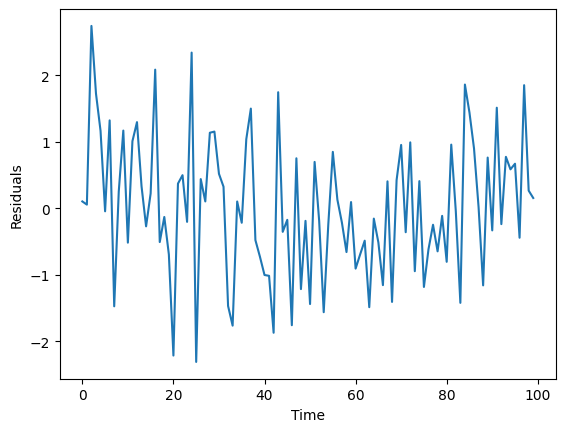

In [20]:
plt.plot(results.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

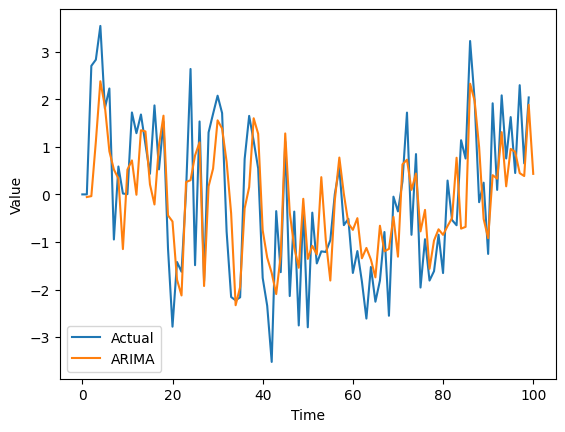

In [21]:
pred = results.predict(start = 1, end = n)

plt.plot(df['Value'], label = 'Actual')
plt.plot(pred, label = 'ARIMA')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()